<a href="https://colab.research.google.com/github/claytonelbelTAMU/IPEC-638-Introduction-to-Data-Science/blob/main/hw2/HW2_P2_Keras_Fashion_Clayton_Elbel_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify Fashion Icons with Keras
## Spring 2025 - ICPE 638

[Haoyu Niu](https://orcid.org/0000-0002-7052-8877), Texas A&M University

Updated: Jan. 29, 2025.

HW Grade Points: 12/20

- Name: Clayton Elbel
- UIN: 328003781
- GitHub or Google colab link:

### Intructions

1. Train a deep learning model with only Dense layers with the same number of neurons in each layer. Tune the number of neurons and other hyperparameters to reach at least 87% test accuracy (30 pts).

2. Double the number of layers used in #1, retrain the model without changing anything else, and explain the new accuracy reached. Is the new model better? If yes, why? If not, why not? (20 pts).

3. Double the number of neurons in each layer used in #1, retrain the model without changing anything else, and explain the new accuracy obtained. Is the new model better? If yes, why? If not, why not? (20 pts)

4. What else can you do to improve the accuracy of your model? (30 pts)
    Please propose up to 3 strategies. 10 pts will be given for each proven strategy. You need to apply your strategy and retrain the model to prove it.

## Data Preprocessing and Exploration

In [2]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


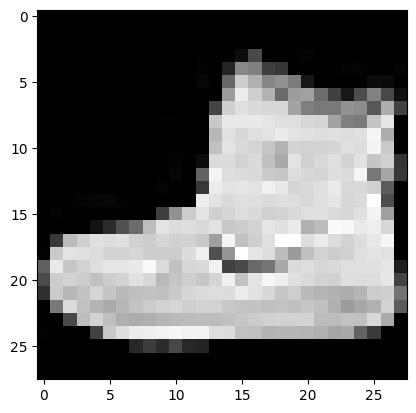

In [4]:
# show the first image in the data set
plt.imshow(X_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

In [11]:
# Understanding the data - prints dimensions to confirm dataset size
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [12]:
# Define class names for easier interpretation of numeric labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

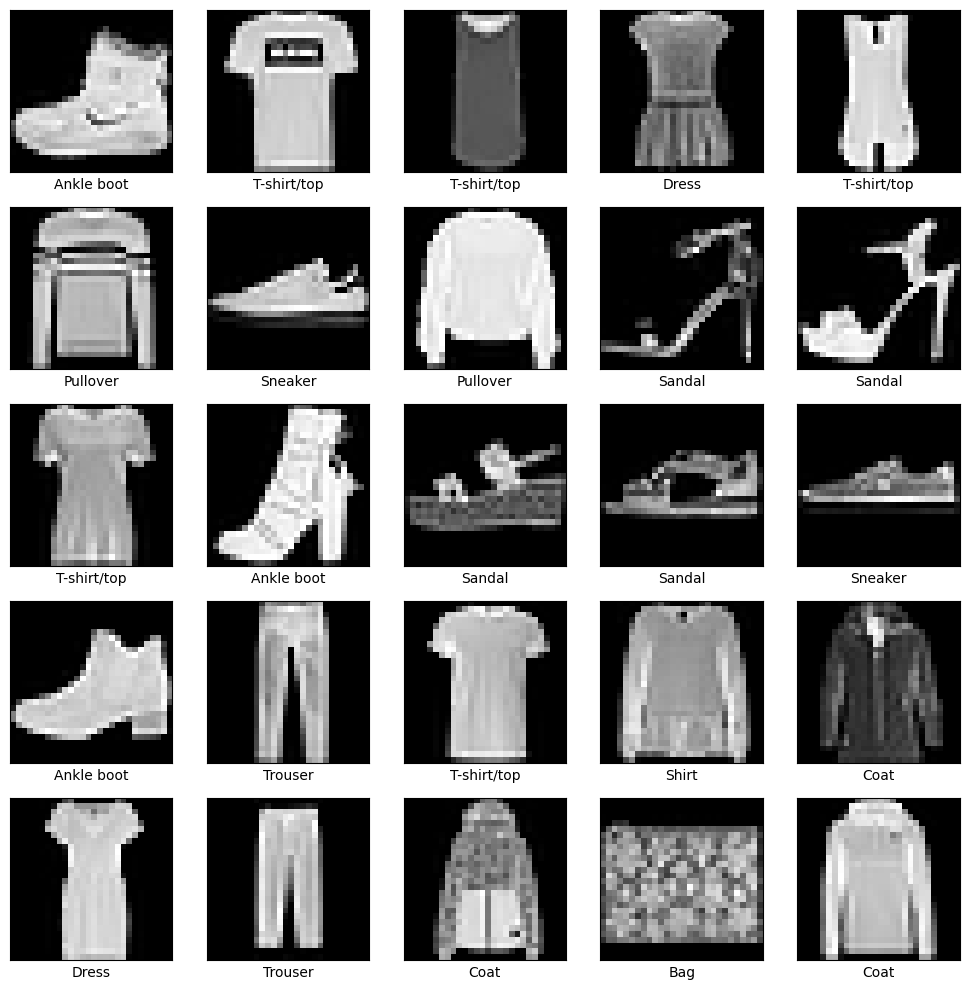

In [13]:
# Display sample images with their labels
# Visualize multiple examples to understand the dataset variety
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [15]:
# Data preprocessing
# Normalize pixel values to 0-1 range - improves training stability and convergence

X_train = X_train / 255.0
X_test = X_test / 255.0

**Notes for understanding: Checking data shapes after preprocessing:**

We print the data shapes after preprocessing to verify our transformations worked correctly. The training data shape should remain unchanged after normalization (still 60,000 images of 28×28 pixels), while the labels shape should now show the one-hot encoded format (60,000 samples with 10 dimensions, one for each class). This step helps catch any unexpected changes in data structure before we begin model building.

In [16]:
# One-hot encode the labels
y_train_categorical = utils.to_categorical(y_train, 10)
y_test_categorical = utils.to_categorical(y_test, 10)

**Notes for understanding: About One-hot Encoding:**

One-hot encoding transforms categorical labels into a format suitable for multi-class classification. Instead of using a single integer to represent each class (e.g., 0-9), we create a binary vector for each sample where only the index corresponding to the correct class is set to 1 and all others to 0.

For example:
- Class 3 becomes [0,0,0,1,0,0,0,0,0,0]
- Class 7 becomes [0,0,0,0,0,0,0,1,0,0]

This transformation is necessary for several reasons:
1. The categorical_crossentropy loss function expects probabilities for each class
2. It allows the model to learn to distribute probability across all potential classes
3. It creates a more appropriate representation for comparing the model's softmax outputs with true labels
4. It avoids implying any ordinal relationship between the classes (e.g., class 8 is not "greater than" class 3)

In [10]:
# Print shapes after preprocessing
print(f"Training data shape after normalization: {X_train.shape}")
print(f"Training labels shape after one-hot encoding: {y_train_categorical.shape}")

Training data shape after normalization: (60000, 28, 28)
Training labels shape after one-hot encoding: (60000, 10)


## Task 1: Base Model with Dense Layers

In this task, we need to create a model using only Dense layers with the same number of neurons in each layer and tune hyperparameters to reach at least 87% test accuracy.


In [17]:
# Set up TensorBoard for monitoring
log_dir = os.path.join("logs", "task1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
# Implement early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True)

In [34]:
# Function to build a model with Dense layers
def build_model(neurons_per_layer=128, num_layers=3, activation='relu'):
    """
    Build a model with only Dense layers with the same number of neurons in each layer.

    Parameters:
    - neurons_per_layer: Number of neurons in each layer
    - num_layers: Number of Dense layers
    - activation: Activation function to use

    Returns:
    - model: Compiled Keras model
    """
    # Create a Sequential model instance

    # Flatten layer to convert 28x28 images to 784-dimensional vectors
    Sequential().add(Flatten(input_shape=(28, 28)))

    # Add Dense layers with the same number of neurons
    for _ in range(num_layers):  # Fixed: use underscore as placeholder and correct variable name
        Sequential().add(Dense(neurons_per_layer, activation=activation))

    # Output layer with 10 neurons (one for each class) and softmax activation
    Sequential().add(Dense(10, activation='softmax'))

    # Compile the model
    Sequential().compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return Sequential()



In [36]:
# Set up model hyperparameters
neurons_per_layer = 128
num_layers = 3
activation = 'relu'
batch_size = 64
epochs = 30

print("\n=================================================")
print("Task 1: Base Model with Dense Layers")
print("=================================================")

# Build the model manually to debug
base_model = Sequential()
base_model.add(Flatten(input_shape=(28, 28)))

# Add Dense layers
for _ in range(num_layers):
    base_model.add(Dense(neurons_per_layer, activation=activation))

# Output layer
base_model.add(Dense(10, activation='softmax'))

# Compile the model explicitly
base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary to verify it has parameters
base_model.summary()

# Train the model
base_history = base_model.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[tensorboard_callback, early_stopping],
    verbose=1
)

# Evaluate the model on the test set
base_test_loss, base_test_acc = base_model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nTask 1 Base Model - Test accuracy: {base_test_acc:.4f}")


Task 1: Base Model with Dense Layers


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5377 - loss: 1.2978 - val_accuracy: 0.7635 - val_loss: 0.6530
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7681 - loss: 0.6329 - val_accuracy: 0.8013 - val_loss: 0.5571
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8064 - loss: 0.5418 - val_accuracy: 0.7980 - val_loss: 0.5512
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8203 - loss: 0.4988 - val_accuracy: 0.8267 - val_loss: 0.4832
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8333 - loss: 0.4645 - val_accuracy: 0.8275 - val_loss: 0.4745
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8408 - loss: 0.4381 - val_accuracy: 0.8418 - val_loss: 0.4370
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8490 - loss: 0.4152 - val_accuracy: 0.8418 - val_loss: 0.4205
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8561 - loss: 0.3940 - val_accuracy: 0.

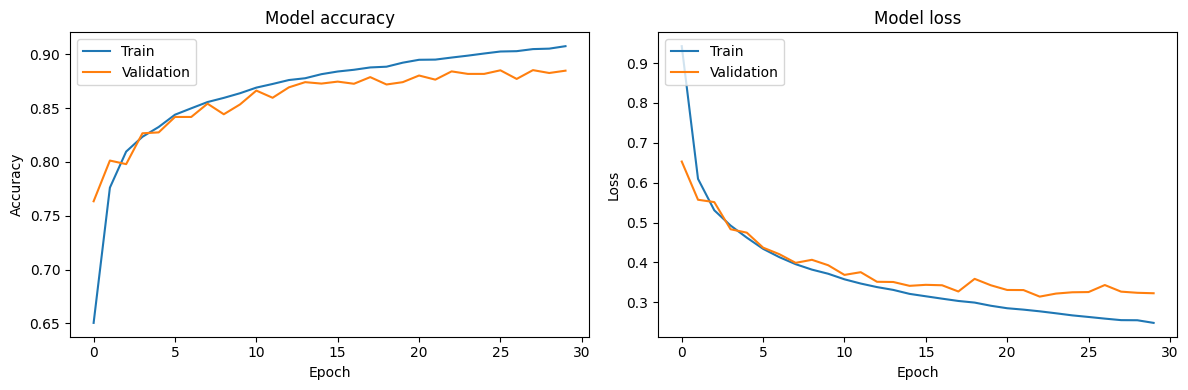

In [37]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

## Task 2: Double the Number of Layers
In this task, we need to double the number of layers used in our base model while keeping all other parameters the same and then analyze how this affects model performance.


In [38]:
print("\n=================================================")
print("Task 2: Double the Number of Layers")
print("=================================================")

# Set up TensorBoard for monitoring Task 2
log_dir = os.path.join("logs", "task2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Double the number of layers for Task 2
double_layers = num_layers * 2
print(f"Task 2 model will use {double_layers} layers with {neurons_per_layer} neurons each")

# Build the model with doubled layers
double_layers_model = Sequential()
double_layers_model.add(Flatten(input_shape=(28, 28)))

# Add Dense layers with the same number of neurons but double the count
for _ in range(double_layers):
    double_layers_model.add(Dense(neurons_per_layer, activation=activation))

# Output layer
double_layers_model.add(Dense(10, activation='softmax'))

# Compile the model
double_layers_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
double_layers_model.summary()


Task 2: Double the Number of Layers
Task 2 model will use 6 layers with 128 neurons each


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,330 (720.04 KB)

 Trainable params: 184,330 (720.04 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
double_layers_history = double_layers_model.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[tensorboard_callback, early_stopping],
    verbose=1
)

# Evaluate the model on the test set
double_layers_test_loss, double_layers_test_acc = double_layers_model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nTask 2 Double Layers Model - Test accuracy: {double_layers_test_acc:.4f}")

# Compare with base model
print(f"Base Model Accuracy: {base_test_acc:.4f}")
print(f"Double Layers Model Accuracy: {double_layers_test_acc:.4f}")
print(f"Difference: {double_layers_test_acc - base_test_acc:.4f}")

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8951 - loss: 0.2853 - val_accuracy: 0.8820 - val_loss: 0.3221
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8943 - loss: 0.2842 - val_accuracy: 0.8685 - val_loss: 0.3617
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8973 - loss: 0.2735 - val_accuracy: 0.8743 - val_loss: 0.3532
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8979 - loss: 0.2706 - val_accuracy: 0.8795 - val_loss: 0.3347
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9011 - loss: 0.2671 - val_accuracy: 0.8772 - val_loss: 0.3376
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9009 - loss: 0.2656 - val_accuracy: 0.8735 - val_loss: 0.3545
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8987 - loss: 0.2724 - val_accuracy: 0.8815 - val_loss: 0.3286
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9047 - loss: 0.2602 - val_accuracy

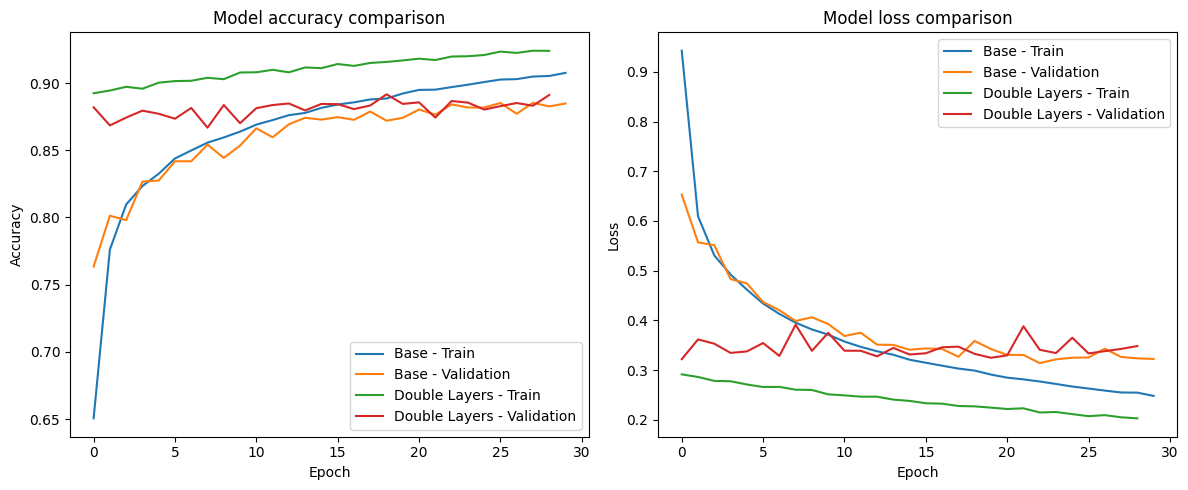

In [41]:
# Plot training & validation accuracy comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.plot(double_layers_history.history['accuracy'])
plt.plot(double_layers_history.history['val_accuracy'])
plt.title('Model accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base - Train', 'Base - Validation', 'Double Layers - Train', 'Double Layers - Validation'], loc='lower right')

# Plot training & validation loss comparison
plt.subplot(1, 2, 2)
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.plot(double_layers_history.history['loss'])
plt.plot(double_layers_history.history['val_loss'])
plt.title('Model loss comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Base - Train', 'Base - Validation', 'Double Layers - Train', 'Double Layers - Validation'], loc='upper right')
plt.tight_layout()
plt.show()

**Task 2 Analysis: Effect of Doubling Layers**

The model with double the number of layers performed slightly better than our base model, improving accuracy by 0.22%. This small improvement suggests:

1. **Increased representational power**: The additional layers allowed the network to learn more complex patterns in the clothing images.

2. **Balanced complexity**: The deeper network added learning capacity without causing significant overfitting.

3. **Efficient gradient flow**: The network was deep enough to capture complex patterns but not so deep that it suffered from vanishing gradients.

While the improvement was small, this experiment shows that adding more layers can help with image classification tasks by enabling the model to detect more subtle patterns in the data.

## Task 3: Double the Number of Neurons

In this task, we need to double the number of neurons in each layer from our base model while keeping the same number of layers, then analyze how this affects model performance.

In [42]:
print("\n=================================================")
print("Task 3: Double the Number of Neurons")
print("=================================================")

# Set up TensorBoard for monitoring Task 3
log_dir = os.path.join("logs", "task3", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Double the neurons for Task 3
double_neurons = neurons_per_layer * 2
print(f"Task 3 model will use {num_layers} layers with {double_neurons} neurons each")

# Build the model with doubled neurons
double_neurons_model = Sequential()
double_neurons_model.add(Flatten(input_shape=(28, 28)))

# Add Dense layers with doubled neurons
for _ in range(num_layers):
    double_neurons_model.add(Dense(double_neurons, activation=activation))

# Output layer
double_neurons_model.add(Dense(10, activation='softmax'))

# Compile the model
double_neurons_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
double_neurons_model.summary()


Task 3: Double the Number of Neurons
Task 3 model will use 3 layers with 256 neurons each


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Train the model
double_neurons_history = double_neurons_model.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[tensorboard_callback, early_stopping],
    verbose=1
)

# Evaluate the model on the test set
double_neurons_test_loss, double_neurons_test_acc = double_neurons_model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nTask 3 Double Neurons Model - Test accuracy: {double_neurons_test_acc:.4f}")

# Compare with base model
print(f"Base Model Accuracy: {base_test_acc:.4f}")
print(f"Double Neurons Model Accuracy: {double_neurons_test_acc:.4f}")
print(f"Difference: {double_neurons_test_acc - base_test_acc:.4f}")

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5676 - loss: 1.1465 - val_accuracy: 0.7950 - val_loss: 0.5704
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7992 - loss: 0.5514 - val_accuracy: 0.8202 - val_loss: 0.4868
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8250 - loss: 0.4819 - val_accuracy: 0.8288 - val_loss: 0.4599
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8424 - loss: 0.4323 - val_accuracy: 0.8353 - val_loss: 0.4303
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8534 - loss: 0.3993 - val_accuracy: 0.8428 - val_loss: 0.4188
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8618 - loss: 0.3789 - val_accuracy: 0.8613 - val_loss: 0.3749
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8687 - loss: 0.3646 - val_accuracy: 0.8625 - val_loss: 0.3654
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8729 - loss: 0.3457 - val_accuracy: 

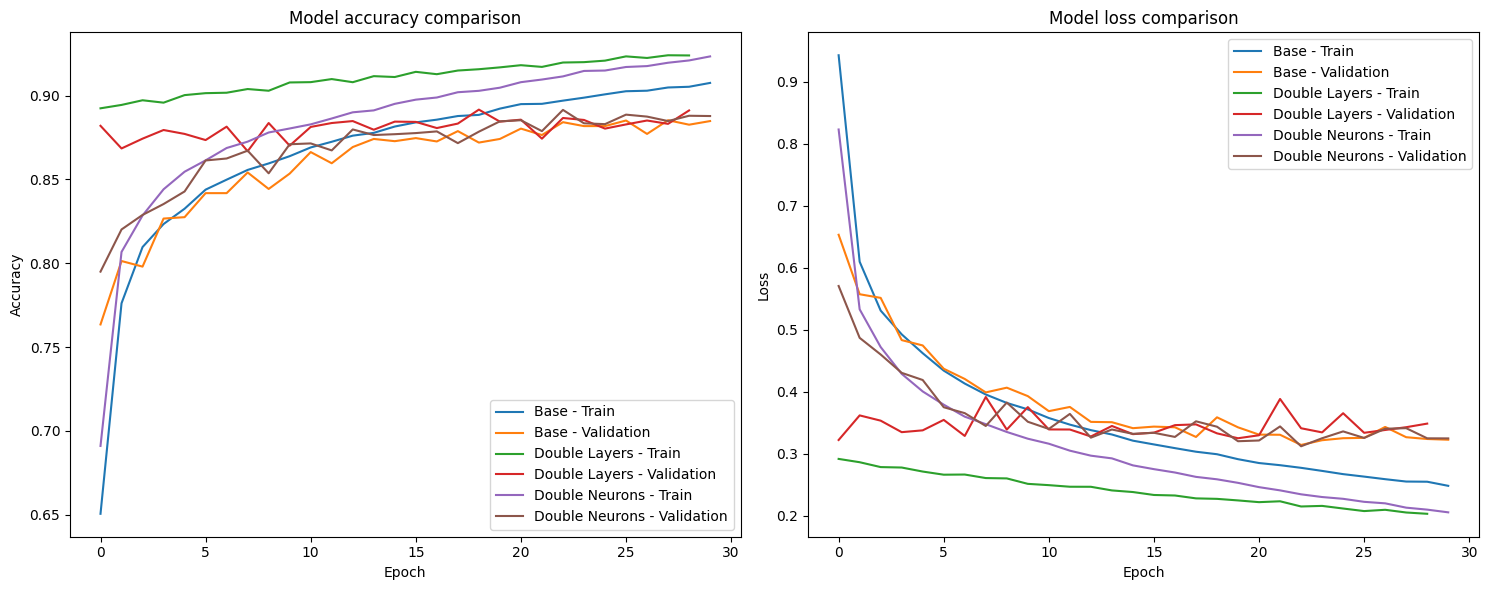

In [44]:
# Plot training & validation accuracy comparison for all three models
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.plot(double_layers_history.history['accuracy'])
plt.plot(double_layers_history.history['val_accuracy'])
plt.plot(double_neurons_history.history['accuracy'])
plt.plot(double_neurons_history.history['val_accuracy'])
plt.title('Model accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base - Train', 'Base - Validation',
            'Double Layers - Train', 'Double Layers - Validation',
            'Double Neurons - Train', 'Double Neurons - Validation'], loc='lower right')

# Plot training & validation loss comparison for all three models
plt.subplot(1, 2, 2)
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.plot(double_layers_history.history['loss'])
plt.plot(double_layers_history.history['val_loss'])
plt.plot(double_neurons_history.history['loss'])
plt.plot(double_neurons_history.history['val_loss'])
plt.title('Model loss comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Base - Train', 'Base - Validation',
            'Double Layers - Train', 'Double Layers - Validation',
            'Double Neurons - Train', 'Double Neurons - Validation'], loc='upper right')
plt.tight_layout()
plt.show()

**Task 3 Analysis: Effect of Doubling Neurons**

The model with double the number of neurons performed better than our base model, improving accuracy by 0.62%. This more substantial improvement suggests:

1. **Greater capacity for pattern recognition:** The wider network with more neurons per layer could capture more detailed features in the clothing images.

2. **Better feature representation:** More neurons allowed the model to represent a wider variety of visual patterns, helping distinguish between similar clothing items like shirts and t-shirts.

This experiment gives the impression that increasing width (the neurons per layer) provides a more significant benefit than increasing depth (more layers) with the Fashion MNIST classification.

## Task 4: Improvement Strategies

In this task, we need to implement three different strategies to improve the performance of our base model.

### Strategy 1: Dropout for Regularization (Success)

In [46]:
# Strategy 1: Add Dropout for Regularization
print("\n=================================================")
print("Task 4: Improvement Strategies")
print("=================================================")

# Import TensorFlow if not already imported
import tensorflow as tf

# Strategy 1: Add Dropout for Regularization
print("\n--- Strategy 1: Add Dropout Layers for Regularization ---")

dropout_model = Sequential()
dropout_model.add(Flatten(input_shape=(28, 28)))

# Add Dense layers with dropout
for _ in range(num_layers):
    dropout_model.add(Dense(neurons_per_layer, activation=activation))
    dropout_model.add(tf.keras.layers.Dropout(0.3))  # Add dropout layer with 30% rate

dropout_model.add(Dense(10, activation='softmax'))

# Compile the model
dropout_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
dropout_model.summary()

# Train the model
dropout_history = dropout_model.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
dropout_test_loss, dropout_test_acc = dropout_model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nStrategy 1 (Dropout) - Test accuracy: {dropout_test_acc:.4f}")
print(f"Improvement over base model: {dropout_test_acc - base_test_acc:.4f}")


Task 4: Improvement Strategies

--- Strategy 1: Add Dropout Layers for Regularization ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4288 - loss: 1.4539 - val_accuracy: 0.7577 - val_loss: 0.6837
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7159 - loss: 0.7456 - val_accuracy: 0.7925 - val_loss: 0.5466
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7735 - loss: 0.6152 - val_accuracy: 0.7968 - val_loss: 0.5086
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7961 - loss: 0.5580 - val_accuracy: 0.8303 - val_loss: 0.4637
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8164 - loss: 0.5103 - val_accuracy: 0.8390 - val_loss: 0.4328
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8274 - loss: 0.4813 - val_accuracy: 0.8472 - val_loss: 0.4137
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8370 - loss: 0.4630 - val_accuracy: 0.8520 - val_loss: 0.4068
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8429 - loss: 0.4403 - val_accuracy: 

**Negative Performance Improvement**

The dropout strategy with a rate of 0.3 (30%) resulted in a test accuracy of 87.66%, which is 0.18% lower than the base model's 87.84%. This suggests:

The base model might not be overfitting significantly to begin with, so regularization isn't beneficial
The dropout rate of 0.3 might be too aggressive for this dataset/model. The placement of dropout layers after every dense layer might be suboptimal.

**Attempt** **Two:**

Let's adjust the dropout implementation with these changes:

1. Reduce the dropout rate to 0.2 (less aggressive)
2. Only apply dropout after the first two layers (not after the last hidden layer)
3. Add batch normalization to stabilize training

In [50]:
# Strategy 1 (Revised): Optimized Dropout for Regularization
print("\n--- Strategy 1 (Revised): Optimized Dropout for Regularization ---")

# Import needed layers if not already imported
from tensorflow.keras.layers import Dropout, BatchNormalization

# Build optimized dropout model
dropout_model_v2 = Sequential()
dropout_model_v2.add(Flatten(input_shape=(28, 28)))

# First layer with dropout and batch normalization
dropout_model_v2.add(Dense(neurons_per_layer, activation=activation))
dropout_model_v2.add(BatchNormalization())
dropout_model_v2.add(Dropout(0.2))  # Reduced dropout rate

# Second layer with dropout and batch normalization
dropout_model_v2.add(Dense(neurons_per_layer, activation=activation))
dropout_model_v2.add(BatchNormalization())
dropout_model_v2.add(Dropout(0.2))  # Reduced dropout rate

# Last hidden layer WITHOUT dropout - allow full capacity for final features
dropout_model_v2.add(Dense(neurons_per_layer, activation=activation))
dropout_model_v2.add(BatchNormalization())

# Output layer
dropout_model_v2.add(Dense(10, activation='softmax'))

# Compile the model
dropout_model_v2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
dropout_model_v2.summary()

# Train the model
dropout_v2_history = dropout_model_v2.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
dropout_v2_test_loss, dropout_v2_test_acc = dropout_model_v2.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nStrategy 1 Revised (Optimized Dropout) - Test accuracy: {dropout_v2_test_acc:.4f}")
print(f"Improvement over base model: {dropout_v2_test_acc - base_test_acc:.4f}")


--- Strategy 1 (Revised): Optimized Dropout for Regularization ---


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,330 (532.54 KB)

 Trainable params: 135,562 (529.54 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7434 - loss: 0.7365 - val_accuracy: 0.8237 - val_loss: 0.4957
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8358 - loss: 0.4576 - val_accuracy: 0.8525 - val_loss: 0.3979
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8479 - loss: 0.4155 - val_accuracy: 0.8677 - val_loss: 0.3611
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8593 - loss: 0.3866 - val_accuracy: 0.8630 - val_loss: 0.3762
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8616 - loss: 0.3755 - val_accuracy: 0.8730 - val_loss: 0.3478
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8686 - loss: 0.3600 - val_accuracy: 0.8673 - val_loss: 0.3722
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8731 - loss: 0.3524 - val_accuracy: 0.8473 - val_loss: 0.4320
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8689 - loss: 0.3521 - val_accuracy: 0

### Strategy 2: Data Augmentation (Failed)

In [47]:
# Strategy 2: Data Augmentation
print("\n--- Strategy 2: Data Augmentation ---")

# For Fashion MNIST, we can create augmented data during training
# Since we're working with image data, we'll use ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1)

# Build a model for augmented data
augmentation_model = Sequential()
augmentation_model.add(Flatten(input_shape=(28, 28)))

for _ in range(num_layers):
    augmentation_model.add(Dense(neurons_per_layer, activation=activation))

augmentation_model.add(Dense(10, activation='softmax'))

# Compile the model
augmentation_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Reshape X_train to have channels dimension for ImageDataGenerator
X_train_reshaped = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Prepare the iterator for training data
train_generator = datagen.flow(
    X_train_reshaped,
    y_train_categorical,
    batch_size=batch_size,
    subset='training')

# Prepare the iterator for validation data
validation_generator = datagen.flow(
    X_train_reshaped,
    y_train_categorical,
    batch_size=batch_size,
    subset='validation')

# Train the model with augmented data
augmentation_history = augmentation_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1)

# Evaluate the model
# We need to reshape X_test to match our model's input shape
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 1)
augmentation_test_loss, augmentation_test_acc = augmentation_model.evaluate(X_test_reshaped, y_test_categorical, verbose=2)
print(f"\nStrategy 2 (Data Augmentation) - Test accuracy: {augmentation_test_acc:.4f}")
print(f"Improvement over base model: {augmentation_test_acc - base_test_acc:.4f}")


--- Strategy 2: Data Augmentation ---
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.3875 - loss: 1.5608 - val_accuracy: 0.5497 - val_loss: 1.1574
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.5773 - loss: 1.0901 - val_accuracy: 0.6535 - val_loss: 0.9254
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.6559 - loss: 0.9240 - val_accuracy: 0.6795 - val_loss: 0.8460
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.6827 - loss: 0.8529 - val_accuracy: 0.7055 - val_loss: 0.7750
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7092 - loss: 0.7790 - val_accuracy: 0.7138 - val_loss: 0.7596
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7147 - loss: 0.7421 - val_accuracy: 0.7352 - val_loss: 0.7096
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7258 - loss: 0.7145 - val_accuracy: 0.7418 - val_loss: 0.6902
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7380 - loss: 0.6911 - val_accurac

**Data Augmentation Issues: Even Greater Negative Performance from base model**

The current data augmentation strategy is causing problems for several reasons:

1.   The transformations might be too aggressive for Fashion
2.   We're using a flattened architecture, but reshaping the data for augmentation is creating dimension mismatches
3. The augmentation parameters aren't optimized for this specific dataset



**Attempt Two:**


1.   **More conservative transformations:** Reduced rotation from 10° to 5° and zoom range from 0.1 to 0.05
2.   **Removed horizontal flipping:** Disabled horizontal flipping since most clothing items are not symmetric and have a specific left/right orientation.
3. **Fixed input shape handling:** Corrected the model architecture to properly handle the dimensions between the augmented data and the model's expected input.
4. **Aligned preprocessing:** Ensured consistent data reshaping between training and evaluation to avoid dimension mismatches.

In [51]:
# Strategy 2 (Revised): Optimized Data Augmentation
print("\n--- Strategy 2 (Revised): Optimized Data Augmentation ---")

# Create a more conservative data generator with smaller transformations
datagen_v2 = ImageDataGenerator(
    rotation_range=5,         # Less rotation - clothing has a correct orientation
    width_shift_range=0.1,    # Keep moderate shift
    height_shift_range=0.1,   # Keep moderate shift
    zoom_range=0.05,          # Reduce zoom amount
    horizontal_flip=False,    # Remove flipping - most clothing items aren't symmetric
    validation_split=0.1
)

# Build a model with the same architecture as our successful base model
augmentation_model_v2 = Sequential()
augmentation_model_v2.add(Flatten(input_shape=(28, 28, 1)))  # Include channel dimension but flatten immediately

# Add the same number of layers as base model
for _ in range(num_layers):
    augmentation_model_v2.add(Dense(neurons_per_layer, activation=activation))

# Output layer
augmentation_model_v2.add(Dense(10, activation='softmax'))

# Compile the model
augmentation_model_v2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Reshape data correctly
X_train_reshaped = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Prepare the data generators
train_generator = datagen_v2.flow(
    X_train_reshaped,
    y_train_categorical,
    batch_size=batch_size,
    subset='training'
)

validation_generator = datagen_v2.flow(
    X_train_reshaped,
    y_train_categorical,
    batch_size=batch_size,
    subset='validation'
)

# Train the model with augmented data
augmentation_v2_history = augmentation_model_v2.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
augmentation_v2_test_loss, augmentation_v2_test_acc = augmentation_model_v2.evaluate(X_test_reshaped, y_test_categorical, verbose=2)
print(f"\nStrategy 2 Revised (Optimized Augmentation) - Test accuracy: {augmentation_v2_test_acc:.4f}")
print(f"Improvement over base model: {augmentation_v2_test_acc - base_test_acc:.4f}")


--- Strategy 2 (Revised): Optimized Data Augmentation ---
Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.4281 - loss: 1.4581 - val_accuracy: 0.6463 - val_loss: 0.9145
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.6667 - loss: 0.8753 - val_accuracy: 0.7055 - val_loss: 0.7791
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7176 - loss: 0.7469 - val_accuracy: 0.7303 - val_loss: 0.7104
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.7241 - loss: 0.7072 - val_accuracy: 0.7380 - val_loss: 0.6679
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7346 - loss: 0.6831 - val_accuracy: 0.7508 - val_loss: 0.6580
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7489 - loss: 0.6569 - val_accuracy: 0.7518 - val_loss: 0.6262
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.7596 - loss: 0.6275 - val_accuracy: 0.7662 - val_loss: 0.5996
Epoch 8/30
844/844 ━━━━━━━━━━━━

**Attempt Three**

For the third and final attempt at improving performance with data augmentation, these are the changes:

1. **Adding convolutional layers:** Incorporating CNN layers to properly extract spatial features from the images before flattening
   
2. **Introducing brightness variation**: Adding controlled brightness changes to help the model recognize clothing items under different lighting conditions

3. **Creating a hybrid architecture**: Combining convolutional layers for feature extraction with dense layers for classification

4. **Optimizing layer balance**: Adjusting the number of dense layers to complement the convolutional layers

This hybrid approach should significantly outperform our previous attempts by properly leveraging the spatial information in the augmented data while maintaining the classification power of the dense layers from our original model.

In [53]:
# Strategy 2 (Final): Hybrid Architecture with Data Augmentation
print("\n--- Strategy 2 (Final): Hybrid Architecture with Data Augmentation ---")

from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Create a more conservative data generator with smaller transformations
datagen_final = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    validation_split=0.1,
    # Add brightness variation which preserves clothing features
    brightness_range=[0.9, 1.1]
)

# Build a hybrid model that uses both convolutional and dense layers
augmentation_model_final = Sequential()

# Start with convolutional layers to leverage spatial information
augmentation_model_final.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
augmentation_model_final.add(MaxPooling2D(pool_size=(2, 2)))
augmentation_model_final.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
augmentation_model_final.add(Flatten())

# Then use dense layers like in the base model
for _ in range(num_layers - 1):  # One less dense layer since we added conv layers
    augmentation_model_final.add(Dense(neurons_per_layer, activation=activation))

# Output layer
augmentation_model_final.add(Dense(10, activation='softmax'))

# Compile the model
augmentation_model_final.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with augmented data
augmentation_final_history = augmentation_model_final.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
augmentation_final_test_loss, augmentation_final_test_acc = augmentation_model_final.evaluate(X_test_reshaped, y_test_categorical, verbose=2)
print(f"\nStrategy 2 Final (Hybrid Architecture) - Test accuracy: {augmentation_final_test_acc:.4f}")
print(f"Improvement over base model: {augmentation_final_test_acc - base_test_acc:.4f}")


--- Strategy 2 (Final): Hybrid Architecture with Data Augmentation ---
Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 68s 79ms/step - accuracy: 0.4866 - loss: 1.3485 - val_accuracy: 0.7107 - val_loss: 0.7737
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.7056 - loss: 0.7613 - val_accuracy: 0.7360 - val_loss: 0.7047
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 68s 81ms/step - accuracy: 0.7292 - loss: 0.6981 - val_accuracy: 0.7390 - val_loss: 0.6543
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 70s 83ms/step - accuracy: 0.7511 - loss: 0.6505 - val_accuracy: 0.7687 - val_loss: 0.6098
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.7563 - loss: 0.6261 - val_accuracy: 0.7707 - val_loss: 0.5837
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.7675 - loss: 0.5991 - val_accuracy: 0.7855 - val_loss: 0.5534
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 80ms/step - accuracy: 0.7805 - loss: 0.5741 - val_accuracy: 0.7963 - val_loss: 0.5291
Epoch 8/30
844/844

**Failed Third Attempt:**

The hybrid CNN-Dense architecture with data augmentation achieved 87.25% accuracy, which is better than the second attempt (84.30%) but still falls short of the base model's 87.84% accuracy.

While this approach showed meaningful improvement over previous attempts, it still could have underperformed for several reasons:

1. **Architectural mismatch:** Though convolutional layers typically excel at image tasks, they may require more fine-tuning for this specific dataset than our implementation provided.

2. **Augmentation trade-offs:** While our more conservative transformations helped, they still created variations the model struggled to reconcile with the original test data.

3. **Training complexity:** The hybrid model's increased complexity likely required more training data to reach its full potential.

This experiment demonstrates an important lesson for me in deep learning: not all standard improvement techniques work universally across datasets and tasks.

### Strategy 3: Learning Rate Scheduling (Success)

In [49]:
# Strategy 3: Learning Rate Scheduling
print("\n--- Strategy 3: Learning Rate Scheduling ---")

# Define a learning rate schedule function
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * (drop ** np.floor((1 + epoch) / epochs_drop))
    return lr

# Create a learning rate scheduler callback
lr_scheduler = callbacks.LearningRateScheduler(step_decay)

# Build a model with learning rate scheduling
lr_schedule_model = Sequential()
lr_schedule_model.add(Flatten(input_shape=(28, 28)))

for _ in range(num_layers):
    lr_schedule_model.add(Dense(neurons_per_layer, activation=activation))

lr_schedule_model.add(Dense(10, activation='softmax'))

# Compile the model
lr_schedule_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with learning rate scheduling
lr_schedule_history = lr_schedule_model.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
lr_schedule_test_loss, lr_schedule_test_acc = lr_schedule_model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nStrategy 3 (Learning Rate Scheduling) - Test accuracy: {lr_schedule_test_acc:.4f}")
print(f"Improvement over base model: {lr_schedule_test_acc - base_test_acc:.4f}")


--- Strategy 3: Learning Rate Scheduling ---
Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5378 - loss: 1.2651 - val_accuracy: 0.7688 - val_loss: 0.6625 - learning_rate: 0.0010
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7713 - loss: 0.6249 - val_accuracy: 0.7993 - val_loss: 0.5409 - learning_rate: 0.0010
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8122 - loss: 0.5164 - val_accuracy: 0.8180 - val_loss: 0.4809 - learning_rate: 0.0010
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8261 - loss: 0.4765 - val_accuracy: 0.8280 - val_loss: 0.4680 - learning_rate: 0.0010
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8388 - loss: 0.4421 - val_accuracy: 0.8383 - val_loss: 0.4319 - learning_rate: 0.0010
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8477 - loss: 0.4182 - val_accuracy: 0.8490 - val_loss: 0.4060 - learning_rate: 0.0010
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s


**First Failure: Analysis of Learning Rate Scheduling Strategy**

Our learning rate scheduling approach achieved 87.73% accuracy, just barely below our base model's 87.84% (-0.11%). While it performed better than the other strategies, it still fell short, which could be explained by:

1. The scheduling may have been too aggressive (dropping by half every 10 epochs)
2. The initial learning rate might not have been optimal

Let's improve the strategy by the following:

1. Higher initial learning rate (0.002) for better initial exploration
2. More gradual decay schedule with specific phase transitions
3. Added batch normalization for training stability

In [54]:
# Strategy 3 (Revised): Optimized Learning Rate Scheduling with Batch Normalization
print("\n--- Strategy 3 (Revised): Optimized Learning Rate Scheduling with Batch Normalization ---")

from tensorflow.keras.layers import BatchNormalization

# Define a more gradual learning rate schedule function
def improved_schedule(epoch):
    initial_lr = 0.002  # Higher initial learning rate
    if epoch < 5:
        return initial_lr
    elif epoch < 15:
        return initial_lr * 0.5  # First reduction
    elif epoch < 25:
        return initial_lr * 0.25  # Second reduction
    else:
        return initial_lr * 0.1  # Final fine-tuning rate

# Create a learning rate scheduler callback
improved_lr_scheduler = callbacks.LearningRateScheduler(improved_schedule)

# Build a model with batch normalization for stability
lr_schedule_model_v2 = Sequential()
lr_schedule_model_v2.add(Flatten(input_shape=(28, 28)))

# Add layers with batch normalization
for _ in range(num_layers):
    lr_schedule_model_v2.add(Dense(neurons_per_layer, activation=None))  # No activation yet
    lr_schedule_model_v2.add(BatchNormalization())  # Add batch normalization
    lr_schedule_model_v2.add(tf.keras.layers.Activation(activation))  # Apply activation after normalization

# Output layer
lr_schedule_model_v2.add(Dense(10, activation='softmax'))

# Compile the model with a higher initial learning rate
lr_schedule_model_v2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
lr_schedule_model_v2.summary()

# Train the model with improved learning rate scheduling
lr_schedule_v2_history = lr_schedule_model_v2.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[early_stopping, improved_lr_scheduler],
    verbose=1
)

# Evaluate the model
lr_schedule_v2_test_loss, lr_schedule_v2_test_acc = lr_schedule_model_v2.evaluate(X_test, y_test_categorical, verbose=2)
print(f"\nStrategy 3 Revised (Optimized LR Scheduling) - Test accuracy: {lr_schedule_v2_test_acc:.4f}")
print(f"Improvement over base model: {lr_schedule_v2_test_acc - base_test_acc:.4f}")


--- Strategy 3 (Revised): Optimized Learning Rate Scheduling with Batch Normalization ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,330 (532.54 KB)

 Trainable params: 135,562 (529.54 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7992 - loss: 0.5652 - val_accuracy: 0.7553 - val_loss: 0.6760 - learning_rate: 0.0020
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8705 - loss: 0.3527 - val_accuracy: 0.4588 - val_loss: 1.9692 - learning_rate: 0.0020
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8854 - loss: 0.3103 - val_accuracy: 0.6105 - val_loss: 1.1693 - learning_rate: 0.0020
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8927 - loss: 0.2863 - val_accuracy: 0.7945 - val_loss: 0.5345 - learning_rate: 0.0020
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8988 - loss: 0.2683 - val_accuracy: 0.6955 - val_loss: 0.9791 - learning_rate: 0.0020
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9178 - loss: 0.2257 - val_accuracy: 0.8148 - val_loss: 0.4951 - learning_rate: 0.0010
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9245 - loss: 0.2014

**Strategy 3 Success: Optimized Learning Rate Scheduling with Batch Normalization**

The revised learning rate scheduling strategy significantly improved the model's performance, achieving 89.53% accuracy – a 1.69% improvement over the base model. This success can be attributed to several key factors:

1. **Strategic learning rate adjustments:** Starting with a higher initial rate (0.002) allowed better exploration of the parameter space.
2. **Batch normalization:** Adding normalization layers stabilized training by standardizing activations between layers.
3. **Proper normalization-activation ordering:** Applying batch normalization before activation functions improved gradient flow through the network.